## Tasks
Analyze a database and, based on it:

* Process the data
* Format (if necessary)
* Train the model
* Predict December sales
* Create a histogram of the data
* Create a scatter plot

In [2]:
# Importing libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Original dictionary (with December sales):
```
{
    'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'sales': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}
```

December sales was **3300**.

In [3]:
# Bringing the dictionary to be used
dict_sales = {
    'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'sales': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [4]:
dict_sales

{'month': ['January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December'],
 'sales': [2000,
  2200,
  2300,
  2500,
  2600,
  2700,
  2800,
  2900,
  3000,
  3100,
  3200,
  3300]}

# Processing the data

In [5]:
# Creating a DataFrame based on the dictionary
df_sales = pd.DataFrame.from_dict(dict_sales)

In [6]:
# Viewing the DataFrame
df_sales

,month,sales
0,January,2000
1,February,2200
2,March,2300
3,April,2500
4,May,2600
5,June,2700
6,July,2800
7,August,2900
8,September,3000
9,October,3100


In [7]:
# Checking the DataFrame structure
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   12 non-null     object
 1   sales   12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


# Formating the data

In [8]:
# Adding a numerical column to represent the months
df_sales['month_number'] = range(1, 13)

In [9]:
# Viewing the updated DataFrame
df_sales

,month,sales,month_number
0,January,2000,1
1,February,2200,2
2,March,2300,3
3,April,2500,4
4,May,2600,5
5,June,2700,6
6,July,2800,7
7,August,2900,8
8,September,3000,9
9,October,3100,10


In [10]:
# Viewing the updated DataFrame structure
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month         12 non-null     object
 1   sales         12 non-null     int64 
 2   month_number  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


# Training the model

### Defining `X` and `y` variables
By convention, we split our data into **independent variables** (or **features**), and **dependent variables** (or **target variables**). The independent variables are used for training the model, and the dependent variable is what we aim to predict.

#### **X (independent variable)**
`X` represents the **features** (or **independent variables**) that we provide to the model to make predictions. In practical terms, `X` is a matrix containing the input data, where each row corresponds to a sample, and each column corresponds to a feature or characteristic of that sample.

#### **y (dependent variable / target variable)**
`y` represents the **target variable** (or **dependent variable**) that the model tries to predict based on the input data in `X`. In classification problems, `y` would be the class (or category) that we want to predict. In regression problems, `y` would be the numerical value that we want to estimate.

In [11]:
# Setting `X` and `y` variables

# X - the feature(s) we'll provide to the model for making predictions (in this case, the month numbers)
# y - the target variable we want the model to predict (in this case, the sales)
# In other words, we want to predict the sales for a given month based on the month number
X = pd.DataFrame(df_sales['month_number'])
y = pd.DataFrame(df_sales['sales'])

For some reason, creating `X` and `y` variables above only with `df_sales['<column_name>']` was generating `Series` objects instead of `DataFrame` objects, even with `df_sales` already being a DataFrame. Scikit-learn's Linear Regression model expects these variables to be 2D arrays (like DataFrames, even with just a single column), while a Series object is 1D.

To correct this, I made sure `X` and `y` were created as DataFrames by adding `pd.DataFrame` around the column selection for both variables.

### Splitting `X` and `y` into training and testing subsets
We need to divide the data into two sets: one for **training** the model (`X_train` and `y_train`), and another for **testing** it (`X_test` and `y_test`).

We want the model to learn the **training subsets** (`X_train` and `y_train`) and understand the relationship between them. Then, we'll present it with the **testing subset** (`X_test`), and based on what it has learned, it will predict the expected values for that subset, storing these predictions in a new variable (`y_pred`). Finally, we'll compare the predictions with our actual results (`y_test`) to evaluate how well the model performed.

The primary goal of this challenge is to predict December's sales. However, I also want to assess the model's ability to generalize to other months. To achieve this, I decided to use 90% of the data to train the model (10 months), and 10% to test it (2 months), so it can make more accurate predictions across multiple months, including December (2 months).

---

Initially, I considered using `random_state=1` to ensure the same random selection of data for training every time. However, this consistently included the December data in the training set, which we want to hide from the model. The goal is for the model to predict December, so we can compare the prediction with the real data.

Based on that, I decided to use `shuffle=False`. This option prevents the data from being shuffled before splitting, ensuring that the training set always consists of the first `train_size` percentage, and the testing set consists of the remainder.


In [12]:
# Splitting `X` and `y` into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=False)

In [13]:
# Checking the subsets length
print(f'X_train length: {len(X_train)}\ny_train length: {len(y_train)}\nX_test length: {len(X_test)}\ny_test length: {len(y_test)}')

X_train length: 10
y_train length: 10
X_test length: 2
y_test length: 2


In [14]:
# Seeing precisely what the model had access to
print(f'X_train:\n{X_train}\n\ny_train:\n{y_train}')

X_train:
   month_number
0             1
1             2
2             3
3             4
4             5
5             6
6             7
7             8
8             9
9            10

y_train:
   sales
0   2000
1   2200
2   2300
3   2500
4   2600
5   2700
6   2800
7   2900
8   3000
9   3100


In [15]:
print(f'X_test:\n{X_test}\n\ny_test:{y_test}')

X_test:
    month_number
10            11
11            12

y_test:    sales
10   3200
11   3300


In [16]:
# Choosing a Linear Regression model
model = LinearRegression()

# Training the choosen model with the train subsets to find a correlation between `X` and `y`
model.fit(X_train, y_train)

LinearRegression()

# Predicting December sales

### Testing the new Linear Regression model

We have created the training and testing subsets. The model has seen the **training subsets** and learned the correlation between `X_train` (the features) and `y_train` (the targets), and now we want to see if, based on this knowledge, it can accurately predict values for a subset it hasn't seen yet (`X_test`).

By convention, the predictions made by the model will be called `y_pred`, and we will compare these predictions with our real results (`y_test`) to assess how well the model performed.

In [17]:
# Generating predictions for the test subset
y_pred = model.predict(X_test)

In [18]:
# Viewing predictions
y_pred

array([[3260.        ],
       [3378.18181818]])

The model predictions for November's and December's sale is:
* November: 3260
* December: 3378.18181818

In [19]:
# Viewing our real results
y_test

,sales
10,3200
11,3300


### A little analysis
Our **real** sales for November and December are:
* November: 3200
* December: 3300

And the **model predictions** were:
* November: 3260
* December: 3378.18181818

### Conclusion
The model has made accurate predictions, staying close to the actual sales values. The prediction error for November was only **60 units**, and for December, **78.18 units**.

**This shows that the model has a good ability to generalize and predict future sales based on the data it was trained on, achieving results that are well-aligned with the real-world data.**

### Seeing the generated coefficients for this model
The **straight line equation** for a Linear Regression is:

$y = ax + b$

Where $a$ is the **angular coefficient** (or **slope**) of the equation, and $b$ is the **linear coefficient** (or **intercept**) of the equation.

There can be many values for $a$, depending on the number of **independent variables (features)** in our model. Each independent variable will have its own $a$ (**slope**), representing its individual impact on the predicted value of `y`.

However, there will be only a single value for $b$ (**intercept**), which represents the value of `y` when all independent variables are equal to zero.

This is a Simple Linear Regression, with only one independent variable (or feature), so we'll have only a single value for $a$.

In [20]:
# Showing the values of `a` for each `x`
model.coef_

array([[118.18181818]])

The value of $a$ (the **angular coefficient** or **slope** of this equation) is `109.3575419`.

In [21]:
# Showing the value of `b`
model.intercept_

array([1960.])

The value of $b$ (the **linear coefficient** or **intercept** of this equation) is `2019.55307263`.

# Creating a histogram of the data

Text(0.5, 0.98, 'Months and Sales histogram')

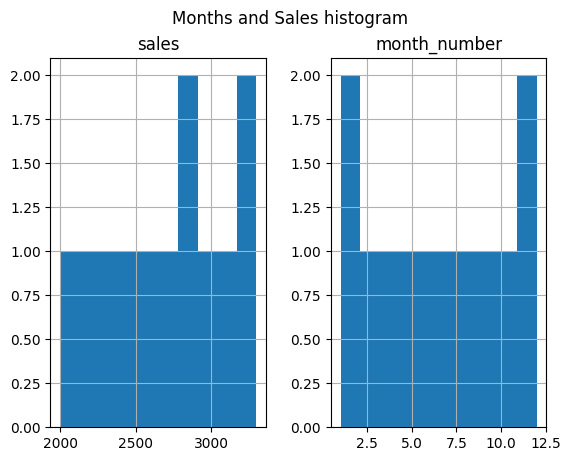

In [33]:
df_sales.hist() # This creates the histogram
plt.suptitle('Months and Sales histogram')

# Creating a scatter plot

Text(0.5, 0.98, 'Scatterplot')

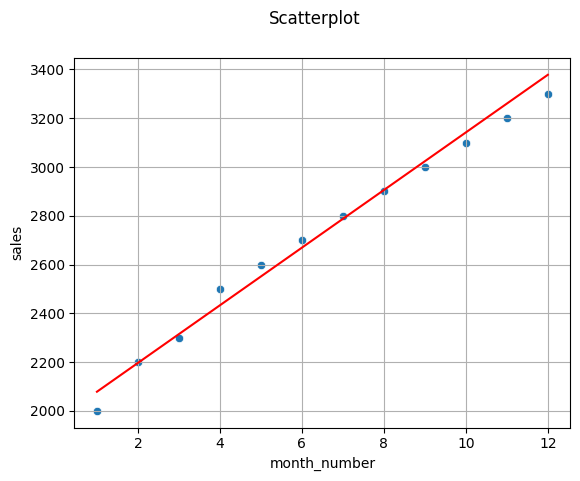

In [41]:
sns.scatterplot(x='month_number', y='sales', data=df_sales) # This creates the scatterplot
plt.plot(df_sales['month_number'], model.predict(df_sales[['month_number']]), color='red') # This creates a red line representing the model's predicted sales based on the linear regression
plt.grid(True) # This activate the grid for a better visualization
plt.suptitle('Scatterplot')

### Interpreting the Scatterplot with Linear Regression Line

The scatterplot above visualizes the relationship between the **month numbers** (on the x-axis) and the **sales** (on the y-axis). Each blue dot represents the actual sales for a specific month.

The red line represents the **predicted sales** based on the linear regression model. This line shows the model's best-fit predictions given the input data. Ideally, if the model performs well, the blue dots (actual values) should be close to the red line (predicted values).

- If the blue dots closely align with the red line, it indicates that the model is accurately predicting sales.
- Any significant deviations between the blue dots and the red line suggest areas where the model's predictions differ from the actual values, indicating possible underfitting or overfitting.

In this case, the model appears to follow a linear pattern, suggesting that the linear regression model has successfully captured the overall trend in the data.
